This notebook illustrates using clustering and our descriptors compounds.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
data = pd.read_csv("../data/processed/descriptors.csv")

In [6]:
data.head(2)

,Compound,logkpl,MLogP,nSmallRings,nAromRings,nRingBlocks,nAromBlocks,nRings3,nRings5,nRings6,...,Kier2,Kier3,naAromAtom,ATSp1,ATSp2,ATSp3,ATSp4,ATSp5,nB,MolIP
0,p-Nitrophenol; 4-nitrophenol,-2.250000,1.68,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,3.408284,2.285714,6.0,373.777514,409.011832,503.255946,390.565769,173.603316,10.0,8.519901
1,Benzyl bromide,-1.892027,2.12,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,3.111111,1.800000,6.0,463.175094,476.652907,530.316455,392.280643,151.974579,8.0,8.338537


In [7]:
scaler = StandardScaler()

In [16]:
without_compound = data.iloc[:, 1:]
without_compound

,logkpl,MLogP,nSmallRings,nAromRings,nRingBlocks,nAromBlocks,nRings3,nRings5,nRings6,WPATH,...,Kier2,Kier3,naAromAtom,ATSp1,ATSp2,ATSp3,ATSp4,ATSp5,nB,MolIP
0,-2.250000,1.68,1.0,1.0,1.0,1.0,0.0,0.0,1.0,120.0,...,3.408284,2.285714,6.0,373.777514,409.011832,503.255946,390.565769,173.603316,10.0,8.519901
1,-1.892027,2.12,1.0,1.0,1.0,1.0,0.0,0.0,1.0,64.0,...,3.111111,1.800000,6.0,463.175094,476.652907,530.316455,392.280643,151.974579,8.0,8.338537
2,-1.545120,2.12,1.0,1.0,1.0,1.0,0.0,0.0,1.0,64.0,...,3.111111,1.800000,6.0,463.175094,476.652907,530.316455,392.280643,151.974579,8.0,8.338537
3,-2.222060,2.12,1.0,1.0,1.0,1.0,0.0,0.0,1.0,64.0,...,3.111111,1.800000,6.0,343.647962,360.656857,405.171149,284.539313,96.667566,8.0,8.556987
4,-1.824345,2.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298.0,...,8.591716,7.100592,0.0,588.801978,590.026029,630.062246,602.270174,511.259323,12.0,8.506996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,-1.962574,2.01,1.0,1.0,1.0,1.0,0.0,0.0,1.0,160.0,...,4.132653,2.500000,6.0,464.519672,506.556888,627.177748,531.515737,294.945868,11.0,5.692748
442,-2.522879,3.22,3.0,2.0,3.0,2.0,0.0,0.0,3.0,776.0,...,7.319857,3.814404,12.0,1463.523298,1699.137067,2304.497980,2369.611558,2174.448135,22.0,7.403870
443,-1.356547,3.33,3.0,2.0,3.0,2.0,0.0,0.0,3.0,906.0,...,8.022222,4.050000,12.0,1541.419630,1786.333801,2417.003610,2524.032167,2325.726872,23.0,7.382447
444,-2.356547,3.44,3.0,2.0,3.0,2.0,0.0,0.0,3.0,1057.0,...,8.740895,4.521118,12.0,1610.633222,1860.512728,2504.980696,2626.093664,2466.174955,24.0,7.371735


In [17]:
X_scaled = scaler.fit_transform(without_compound)

In [18]:
n_clusters=20
cost=[]
for i in range(1, n_clusters):
    kmean= KMeans(i, n_init=10)
    kmean.fit(X_scaled)
    cost.append(kmean.inertia_)  

c:\Users\ahmed\miniconda3\envs\ds\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ahmed\miniconda3\envs\ds\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ahmed\miniconda3\envs\ds\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ahmed\miniconda3\envs\ds\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is k

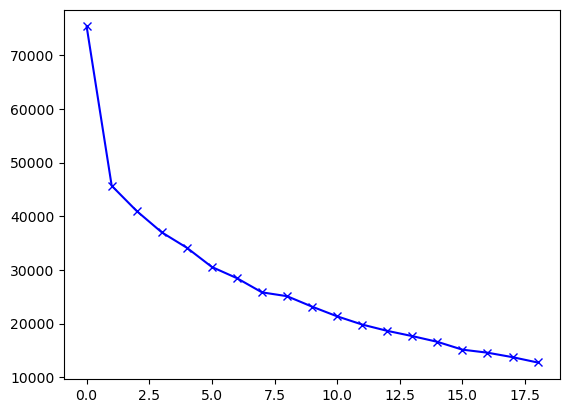

In [19]:
plt.plot(cost, 'bx-')

In [52]:
kmean = KMeans(5, n_init=10, max_iter=400)
kmean.fit(X_scaled)
labels = kmean.labels_

c:\Users\ahmed\miniconda3\envs\ds\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [53]:
clusters = pd.concat([without_compound, pd.DataFrame({'cluster': labels})], axis=1)
clusters.head()

,logkpl,MLogP,nSmallRings,nAromRings,nRingBlocks,nAromBlocks,nRings3,nRings5,nRings6,WPATH,...,Kier3,naAromAtom,ATSp1,ATSp2,ATSp3,ATSp4,ATSp5,nB,MolIP,cluster
0,-2.250000,1.68,1.0,1.0,1.0,1.0,0.0,0.0,1.0,120.0,...,2.285714,6.0,373.777514,409.011832,503.255946,390.565769,173.603316,10.0,8.519901,1
1,-1.892027,2.12,1.0,1.0,1.0,1.0,0.0,0.0,1.0,64.0,...,1.800000,6.0,463.175094,476.652907,530.316455,392.280643,151.974579,8.0,8.338537,1
2,-1.545120,2.12,1.0,1.0,1.0,1.0,0.0,0.0,1.0,64.0,...,1.800000,6.0,463.175094,476.652907,530.316455,392.280643,151.974579,8.0,8.338537,1
3,-2.222060,2.12,1.0,1.0,1.0,1.0,0.0,0.0,1.0,64.0,...,1.800000,6.0,343.647962,360.656857,405.171149,284.539313,96.667566,8.0,8.556987,1
4,-1.824345,2.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298.0,...,7.100592,0.0,588.801978,590.026029,630.062246,602.270174,511.259323,12.0,8.506996,4


In [54]:
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(X_scaled), columns=['PC1','PC2'])
pca_data['cluster'] = pd.Categorical(kmean.labels_)
pca_data

,PC1,PC2,cluster
0,-7.327199,-1.450374,1
1,-7.324766,-4.397774,1
2,-7.329245,-4.432410,1
3,-8.007982,-2.118530,1
4,-4.469871,2.147807,4
...,...,...,...
441,-6.390847,-1.667954,1
442,0.479389,-7.911524,2
443,1.217783,-7.776306,2
444,1.764531,-7.670935,2


In [55]:
pca.explained_variance_ratio_

array([0.44922987, 0.08813972])

In [56]:
model = PCA(n_components=2).fit(without_compound)
X_pc = model.transform(without_compound)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = without_compound.columns

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))

df

,0,1
0,PC1,ATSp4
1,PC2,WPATH


In [57]:
pca_data2 = pd.DataFrame(X_pc, columns=['PC1','PC2'])
pca_data2['cluster'] = pd.Categorical(kmean.labels_)
pca_data2

,PC1,PC2,cluster
0,-3004.356375,-133.913905,1
1,-2961.676231,-166.282516,1
2,-2961.676245,-166.282599,1
3,-3157.976357,-92.583401,1
4,-2318.426329,309.919512,4
...,...,...,...
441,-2719.874084,-107.578467,1
442,1039.728876,121.243507,2
443,1383.582268,277.946797,2
444,1684.406606,479.482331,2


In [58]:
model.explained_variance_ratio_

array([0.98114111, 0.01265786])

In [59]:
data[['ATSp4', 'WPATH']]

,ATSp4,WPATH
0,390.565769,120.0
1,392.280643,64.0
2,392.280643,64.0
3,284.539313,64.0
4,602.270174,298.0
...,...,...
441,531.515737,160.0
442,2369.611558,776.0
443,2524.032167,906.0
444,2626.093664,1057.0


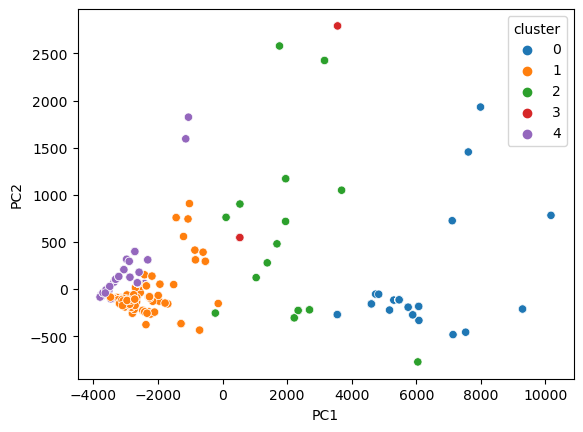

In [60]:
sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_data2)
plt.show()

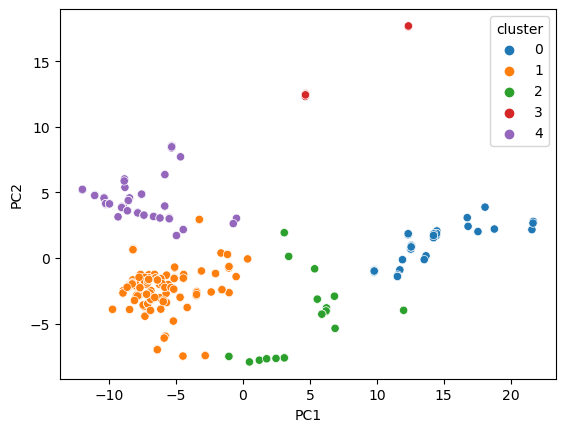

In [61]:
sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_data)
plt.show()

# Interpretation

In [63]:
sss = pd.concat([pca_data, data['Compound']], axis=1)

176

In [65]:
for co in sss['Compound'].unique():
    sss[sss['Compound'] == co]['cluster'].nunique()

1    183
0    111
4     88
2     55
3      9
Name: cluster, dtype: int64

array(['Raffinose', 'Sucrose', 'sucrose'], dtype=object)

In [69]:
sss.sort_values('cluster', inplace=True)
sss

,PC1,PC2,cluster,Compound
148,12.548677,0.754661,0,Corticosterone
158,12.548147,0.750561,0,Corticosterone
159,12.545613,0.730963,0,Corticosterone
160,12.541313,0.697709,0,Corticosterone
161,12.554609,0.800542,0,Corticosterone
...,...,...,...,...
275,-7.402721,3.268479,4,Heptanol
263,-8.480381,4.588922,4,"2,3-Butanediol"
377,-5.329351,8.477958,4,Mannitol
386,-9.059548,3.906309,4,Butanol


In [70]:
sss.to_excel('../results/clusters.xlsx', index=False)

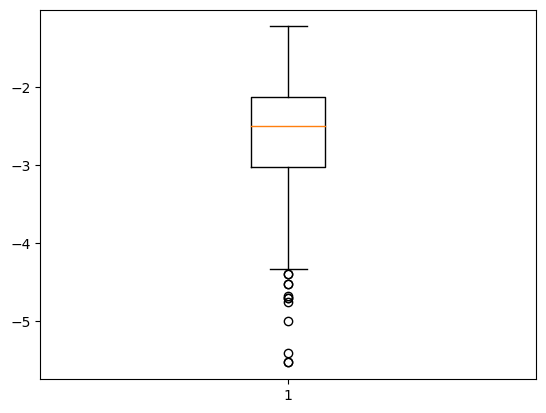

0 -2.736433256119832


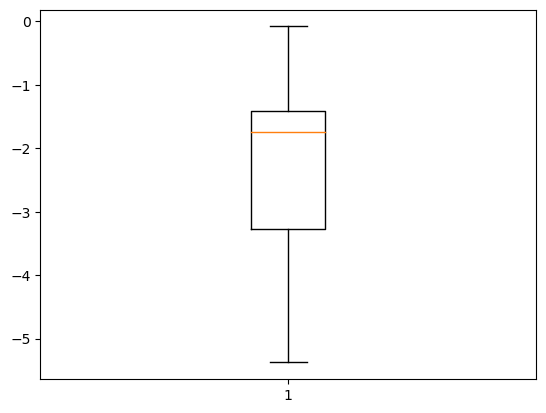

1 -2.3230904693966363


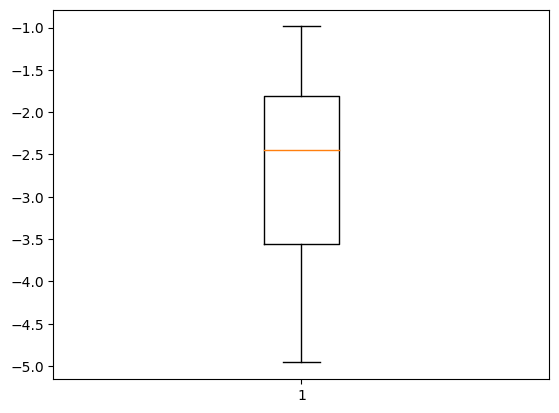

2 -2.640283785166799


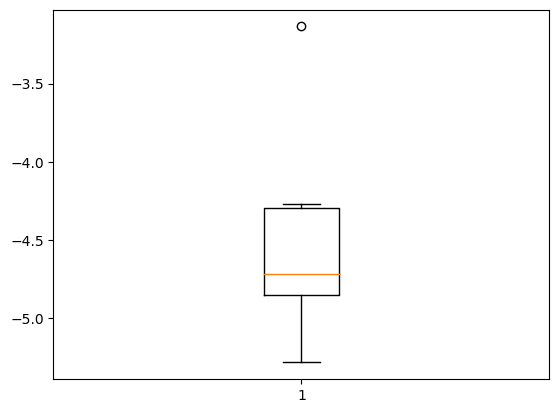

3 -4.5283122636687505


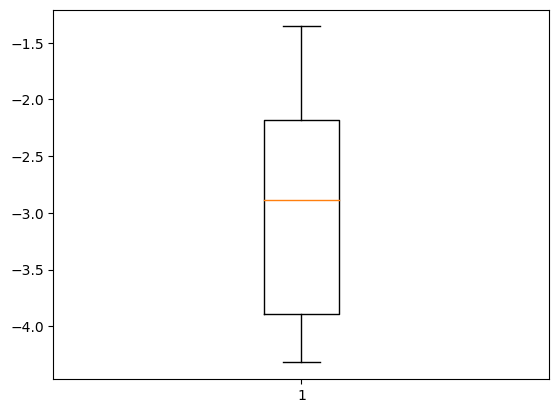

4 -2.9694530005982904


In [124]:
for i in range(0, 5):
    plt.boxplot(clusters[clusters['cluster'] == i]['logkpl'], )
    plt.show()
    print(i, clusters[clusters['cluster'] == i]['logkpl'].mean())

In [119]:
clusters['cluster'].unique()

array([1, 2, 4, 0, 3])